In [ ]:
!pip install basedosdados


In [2]:
!pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00


In [4]:
import basedosdados as bd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

import kaleido

In [171]:
query = """
SELECT *
FROM basedosdados.br_ibge_pam.lavoura_permanente
WHERE sigla_uf = 'PE'
"""

df = bd.read_sql(query, billing_project_id='eda-pam')

Downloading: 100%|██████████| 342608/342608 [00:20<00:00, 17094.87rows/s]


In [172]:
df


,ano,sigla_uf,id_municipio,produto,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
0,1980,PE,2600054,Guaraná (semente),<NA>,<NA>,NaN,NaN,NaN
1,1980,PE,2600054,Erva-mate (folha verde),<NA>,<NA>,NaN,NaN,NaN
2,1980,PE,2600054,Castanha de caju,<NA>,<NA>,NaN,NaN,NaN
3,1980,PE,2600054,Chá-da-índia (folha verde),<NA>,<NA>,NaN,NaN,NaN
4,1980,PE,2600054,Manga,<NA>,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
342603,2003,PE,2616506,Coco-da-baía*,4,4,52.00,"13,000.00",13.00
342604,2003,PE,2616506,Borracha (látex coagulado),60,4,18.00,"4,500.00",20.00
342605,2003,PE,2616506,Laranja,5,5,15.00,"3,000.00",2.00
342606,2003,PE,2616506,Café (em grão) Total,21,21,38.00,"1,809.00",61.00


In [173]:
df.shape

(342608, 9)

In [174]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342608 entries, 0 to 342607
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano                        342608 non-null  Int64  
 1   sigla_uf                   342608 non-null  object 
 2   id_municipio               342608 non-null  object 
 3   produto                    342608 non-null  object 
 4   area_destinada_colheita    24476 non-null   Int64  
 5   area_colhida               36558 non-null   Int64  
 6   quantidade_produzida       36558 non-null   float64
 7   rendimento_medio_producao  36535 non-null   float64
 8   valor_producao             36548 non-null   float64
dtypes: Int64(3), float64(3), object(3)
memory usage: 24.5+ MB
None


In [175]:
df.isnull().sum()

ano                               0
sigla_uf                          0
id_municipio                      0
produto                           0
area_destinada_colheita      318132
area_colhida                 306050
quantidade_produzida         306050
rendimento_medio_producao    306073
valor_producao               306060
dtype: int64

In [249]:
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'produto', 'area_destinada_colheita',
       'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao',
       'valor_producao'],
      dtype='object')

In [250]:
df.head(20)

,ano,sigla_uf,id_municipio,produto,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
7028,2021,PE,2600054,Limão,13,13,195.00,"15,000.00",293.00
7029,2021,PE,2600054,Banana (cacho),15,15,105.00,"7,000.00",105.00
7060,2021,PE,2600104,Mamão,2,2,32.00,"16,000.00",58.00
7061,2021,PE,2600104,Limão,2,2,8.00,"4,000.00",20.00
7062,2021,PE,2600104,Laranja,3,3,12.00,"4,000.00",10.00
7063,2021,PE,2600104,Goiaba,4,4,35.00,"8,750.00",52.00
7064,2021,PE,2600104,Castanha de caju,7,7,7.00,"1,000.00",20.00
7065,2021,PE,2600104,Manga,9,9,49.00,"5,444.00",44.00
7066,2021,PE,2600104,Coco-da-baía*,9,9,46.00,"5,111.00",58.00
7067,2021,PE,2600104,Banana (cacho),10,10,88.00,"8,800.00",231.00


In [251]:
df = df.dropna(subset=['area_destinada_colheita', 'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao', 'valor_producao'])


In [252]:
df.describe()

,ano,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
count,"24,340.00","24,340.00","24,340.00","24,340.00","24,340.00","24,340.00"
mean,"2,003.18",130.94,125.01,"1,493.98","10,581.23","1,293.40"
std,9.76,547.15,515.34,"10,262.49","13,001.81","19,507.40"
min,"1,988.00",1.00,1.00,0.30,5.00,0.00
25%,"1,995.00",5.00,5.00,20.00,"3,000.00",2.00
50%,"2,002.00",12.00,12.00,75.00,"7,000.00",13.00
75%,"2,011.00",50.00,50.00,320.00,"12,800.00",80.00
max,"2,022.00","16,800.00","15,000.00","369,000.00","248,000.00","1,189,595.00"


In [253]:
df['produto'].nunique()

22

In [16]:
df['produto'].unique()

array(['Limão', 'Banana (cacho)', 'Mamão', 'Laranja', 'Goiaba',
       'Castanha de caju', 'Manga', 'Coco-da-baía*', 'Maracujá',
       'Abacate', 'Borracha (látex coagulado)', 'Café (em grão) Total',
       'Café (em grão) Arábica', 'Urucum (semente)', 'Uva', 'Açaí',
       'Algodão arbóreo (em caroço)', 'Tangerina',
       'Sisal ou agave (fibra)', 'Pimenta-do-reino', 'Palmito', 'Figo'],
      dtype=object)

In [255]:
#df['produto'] = df['produto'].astype(str)
#df['produto'] = df['produto'].str.replace('Coco-da-baía*', 'Coco-da-baía')


In [256]:
df['produto']

7028                           Limão
7029                  Banana (cacho)
7060                           Mamão
7061                           Limão
7062                         Laranja
                     ...            
342603                 Coco-da-baía*
342604    Borracha (látex coagulado)
342605                       Laranja
342606          Café (em grão) Total
342607                Banana (cacho)
Name: produto, Length: 24340, dtype: object

In [269]:
quantidade_produzida = df.groupby('ano')['quantidade_produzida'].sum().reset_index()
quantidade_produzida

,ano,quantidade_produzida
0,1988,"747,007.26"
1,1989,"753,448.36"
2,1990,"745,830.09"
3,1991,"764,981.17"
4,1992,"767,374.67"
5,1993,"689,764.69"
6,1994,"749,365.05"
7,1995,"780,694.54"
8,1996,"736,845.16"
9,1997,"778,949.52"


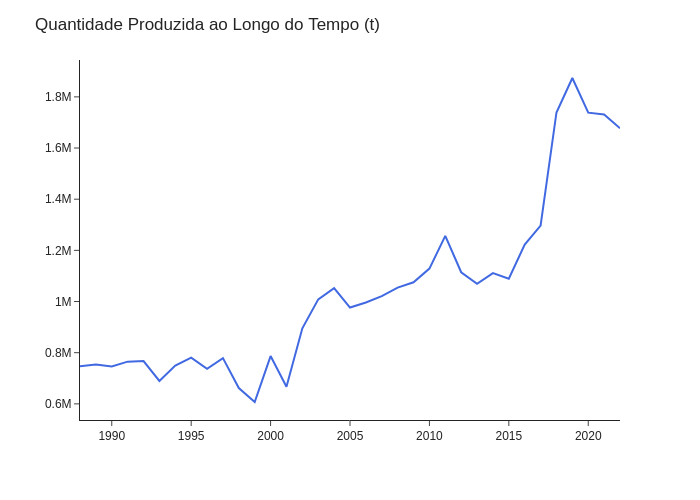

In [270]:
fig = px.line(quantidade_produzida, x='ano', y='quantidade_produzida',
              color_discrete_sequence=['RoyalBlue'])
fig.update_layout(title='Quantidade Produzida ao Longo do Tempo (t)',
                  xaxis_title='',
                  yaxis_title='',
                  template='simple_white'
                  )
fig.show('png')


In [271]:
quantidade_produzida_periodo = quantidade_produzida[(quantidade_produzida['ano'] >= 2012) & (quantidade_produzida['ano'] <= 2022)]

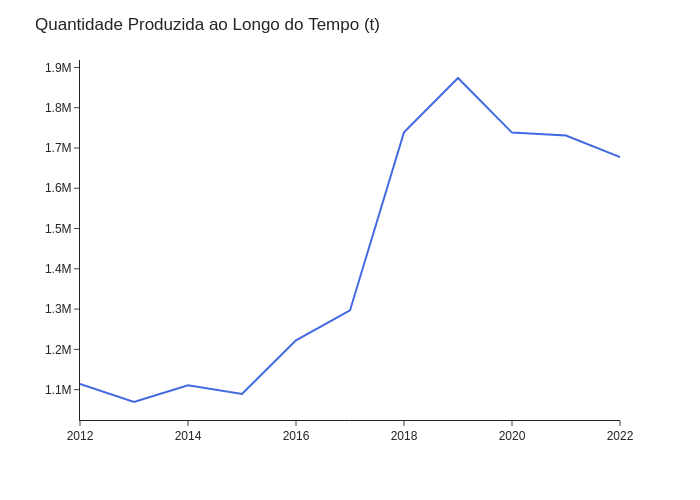

In [272]:
fig = px.line(quantidade_produzida_periodo, x='ano', y='quantidade_produzida',
              color_discrete_sequence=['RoyalBlue'])
fig.update_layout(title='Quantidade Produzida ao Longo do Tempo (t)',
                  xaxis_title='',
                  yaxis_title='',
                  template='simple_white')
fig.show('png')

In [261]:
df_top10_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head(10).reset_index()
df_top10_produtos


,produto,quantidade_produzida
0,Banana (cacho),"14,547,774.40"
1,Manga,"6,136,589.60"
2,Uva,"5,874,001.00"
3,Goiaba,"3,696,930.60"
4,Coco-da-baía*,"3,391,789.00"
5,Laranja,"1,456,203.00"
6,Maracujá,"352,748.35"
7,Mamão,"240,303.60"
8,Tangerina,"185,437.10"
9,Castanha de caju,"134,531.00"


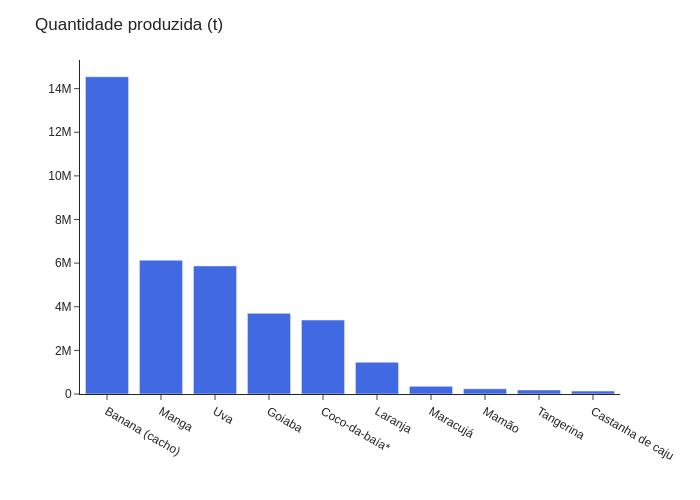

In [264]:
fig = px.bar(df_top10_produtos, x='produto', y='quantidade_produzida',
             color_discrete_sequence=['RoyalBlue'])
fig.update_layout(title='Quantidade produzida (t)',
                  xaxis_title='',
                  yaxis_title='',
                  template='simple_white')
fig.show('png')

In [247]:
df_top5_produtos = df.groupby('produto')['quantidade_produzida'].sum().sort_values(ascending=False).head().reset_index()
df_top5_produtos

,produto,quantidade_produzida
0,Banana (cacho),"14,547,774.40"
1,Manga,"6,136,589.60"
2,Uva,"5,874,001.00"
3,Goiaba,"3,696,930.60"
4,Coco-da-baía*,"3,391,789.00"


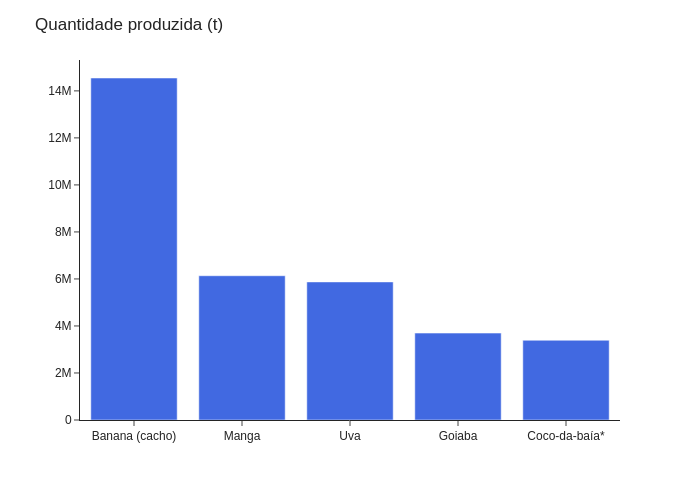

In [263]:
fig = px.bar(df_top5_produtos, x='produto', y='quantidade_produzida',
             color_discrete_sequence=['RoyalBlue'])
fig.update_layout(title='Quantidade produzida (t)',
                  xaxis_title='',
                  yaxis_title='',
                  template='simple_white')
fig.show('png')



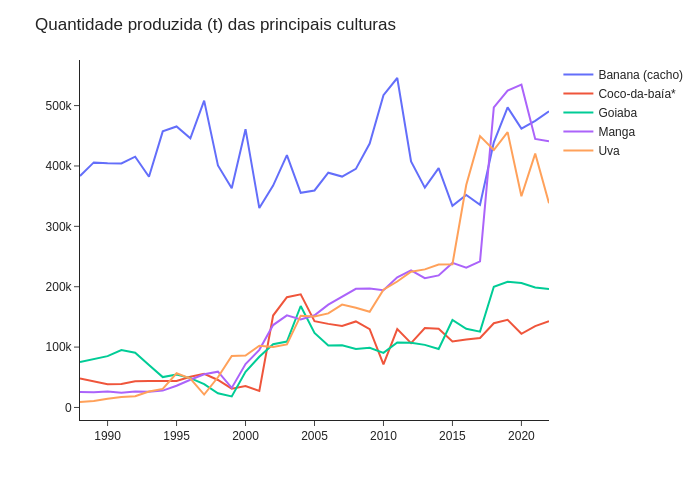

In [90]:
df_top5_produtos_por_ano = df[df['produto'].isin(df_top5_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()

fig = px.line(df_top5_produtos_por_ano, x='ano', y='quantidade_produzida',
              color='produto')
fig.update_layout(title='Quantidade produzida (t) das principais culturas',
                  xaxis_title='',
                  yaxis_title='',
                  legend_title_text='',
                  template='simple_white')
fig.show('png')


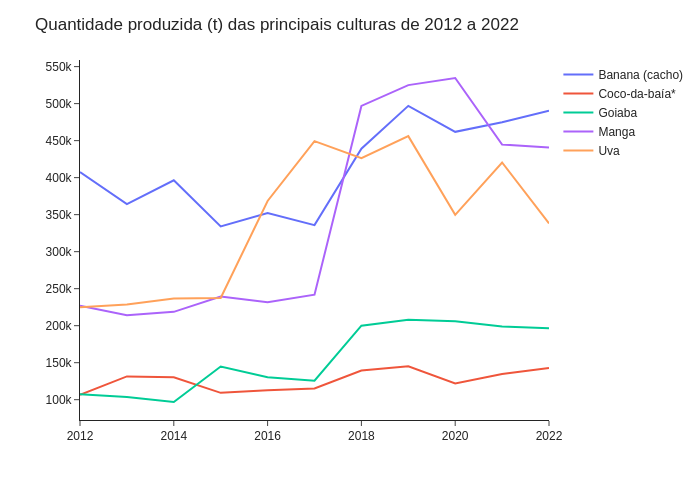

In [97]:
df_top5_produtos_por_ano_filtrado = df_top5_produtos_por_ano[(df_top5_produtos_por_ano['ano'] >= 2012) & (df_top5_produtos_por_ano['ano'] <= 2022)]

fig = px.line(df_top5_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida',
              color='produto')
fig.update_layout(title='Quantidade produzida (t) das principais culturas de 2012 a 2022',
                  xaxis_title='',
                  yaxis_title='',
                  legend_title_text='',
                  template='simple_white')
fig.show('png')


In [28]:
df.corr()

,ano,area_destinada_colheita,area_colhida,quantidade_produzida,rendimento_medio_producao,valor_producao
ano,1.000000,0.026305,0.034027,0.070899,-0.151169,0.078325
area_destinada_colheita,0.026305,1.000000,0.985387,0.688488,0.021094,0.425260
area_colhida,0.034027,0.985387,1.000000,0.719775,0.025554,0.443076
quantidade_produzida,0.070899,0.688488,0.719775,1.000000,0.154479,0.798357
rendimento_medio_producao,-0.151169,0.021094,0.025554,0.154479,1.000000,0.106495
valor_producao,0.078325,0.425260,0.443076,0.798357,0.106495,1.000000


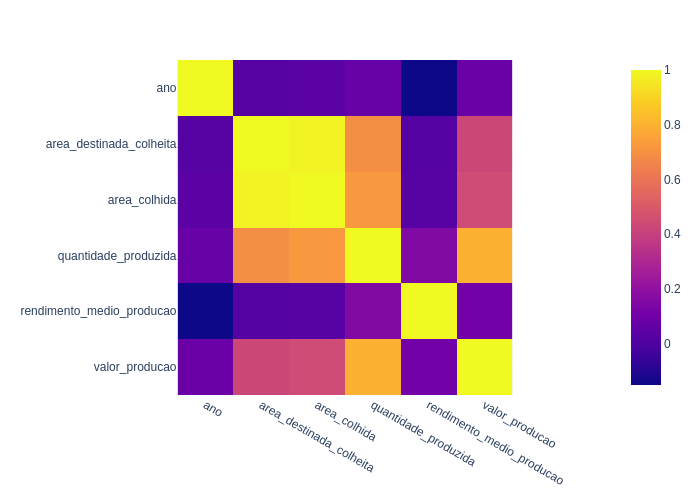

In [29]:
fig = px.imshow(df.corr())
fig.show('png')

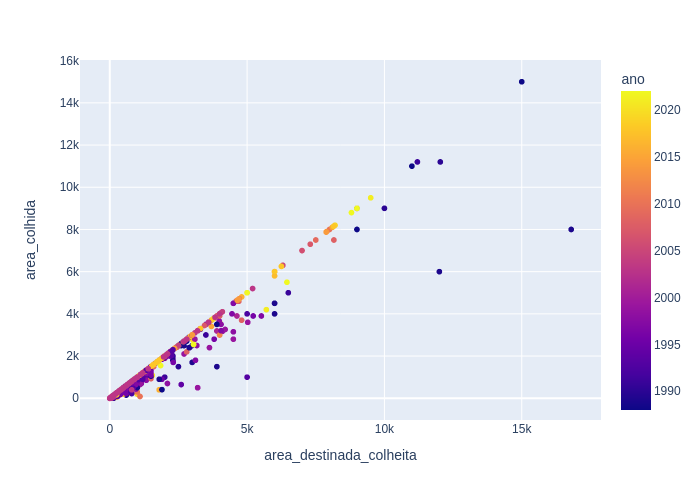

In [30]:
fig = px.scatter(df, x='area_destinada_colheita', y="area_colhida", color='ano')
fig.show('png')

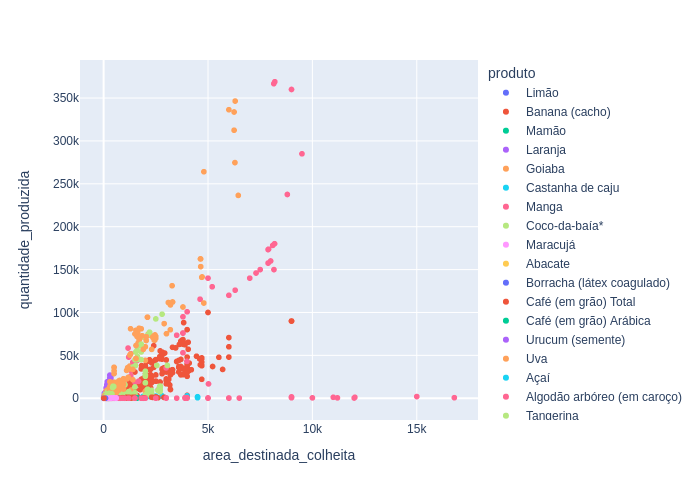

In [31]:
fig = px.scatter(df, x='area_destinada_colheita', y="quantidade_produzida", color='produto')
fig.show('png')

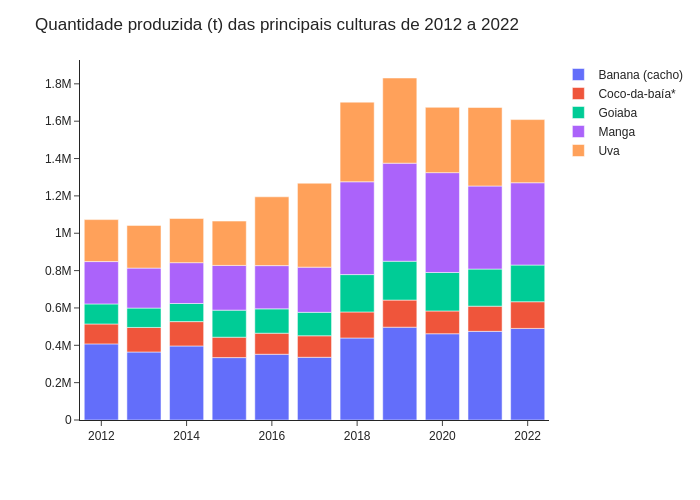

In [98]:
fig = px.bar(df_top5_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida',
             color='produto')
fig.update_layout(title='Quantidade produzida (t) das principais culturas de 2012 a 2022',
                  xaxis_title='',
                  yaxis_title='',
                  legend_title_text='',
                  template='simple_white')
fig.show('png')



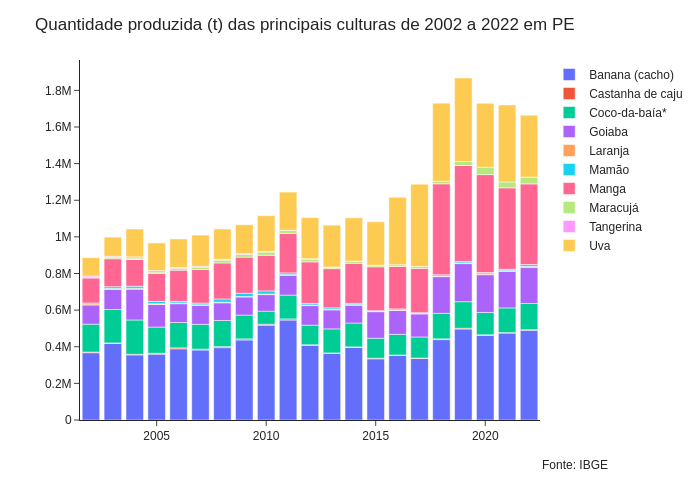

In [110]:
df_top10_produtos_por_ano = df[df['produto'].isin(df_top10_produtos['produto'])].groupby(['produto', 'ano'])['quantidade_produzida'].sum().reset_index()

df_top10_produtos_por_ano_filtrado = df_top10_produtos_por_ano[(df_top10_produtos_por_ano['ano'] >= 2002) & (df_top10_produtos_por_ano['ano'] <= 2022)]

fig = px.bar(df_top10_produtos_por_ano_filtrado, x='ano', y='quantidade_produzida',
             color='produto')
fig.update_layout(title='Quantidade produzida (t) das principais culturas de 2002 a 2022 em PE',
                  xaxis_title='',
                  yaxis_title='',
                  legend_title_text='',
                  template='simple_white')
fig.update_layout(
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1,
            y=-0.1,  # Ajuste a coordenada y para posicionar o rodapé abaixo do gráfico
            xanchor='left',
            yanchor='top',
            text='Fonte: IBGE',
            font=dict(size=12),
            showarrow=False
        )
    ]
)
fig.show('png')


In [34]:
df_area_por_ano = df[df['ano'] > 1987].groupby('ano')[['area_destinada_colheita', 'area_colhida']].sum().reset_index()
df_area_por_ano


,ano,area_destinada_colheita,area_colhida
0,1988,135298,129176
1,1989,135089,105539
2,1990,117669,111146
3,1991,106318,102338
4,1992,102394,98816
5,1993,87935,81016
6,1994,80689,76590
7,1995,79956,78732
8,1996,86429,79556
9,1997,93111,83853


In [35]:
percent_area_colhida = (df_area_por_ano['area_colhida'] / df_area_por_ano['area_destinada_colheita']) * 100
percent_area_colhida

0     95.475173
1     78.125532
2     94.456484
3     96.256513
4     96.505655
5     92.131688
6     94.920001
7     98.469158
8     92.047808
9     90.057029
10    85.731786
11    80.391541
12    99.275362
13    94.618708
14    97.665259
15    99.302254
16     99.45705
17    99.590363
18    99.808088
19    99.830642
20    93.315153
21    99.918692
22    96.276328
23        100.0
24    98.213705
25    99.569791
26    99.371523
27    99.051097
28    95.252787
29    99.261602
30    99.559269
31    97.262812
32    97.294779
33    97.235668
34    97.660806
dtype: Float64

In [36]:
df_area_por_ano['percent_area_colhida'] = percent_area_colhida
df_area_por_ano


,ano,area_destinada_colheita,area_colhida,percent_area_colhida
0,1988,135298,129176,95.475173
1,1989,135089,105539,78.125532
2,1990,117669,111146,94.456484
3,1991,106318,102338,96.256513
4,1992,102394,98816,96.505655
5,1993,87935,81016,92.131688
6,1994,80689,76590,94.920001
7,1995,79956,78732,98.469158
8,1996,86429,79556,92.047808
9,1997,93111,83853,90.057029


In [37]:
df_area_por_ano.sort_values('percent_area_colhida', ascending=True)


,ano,area_destinada_colheita,area_colhida,percent_area_colhida
1,1989,135089,105539,78.125532
11,1999,89186,71698,80.391541
10,1998,88161,75582,85.731786
9,1997,93111,83853,90.057029
8,1996,86429,79556,92.047808
5,1993,87935,81016,92.131688
20,2008,100107,93415,93.315153
2,1990,117669,111146,94.456484
13,2001,78234,74024,94.618708
6,1994,80689,76590,94.920001


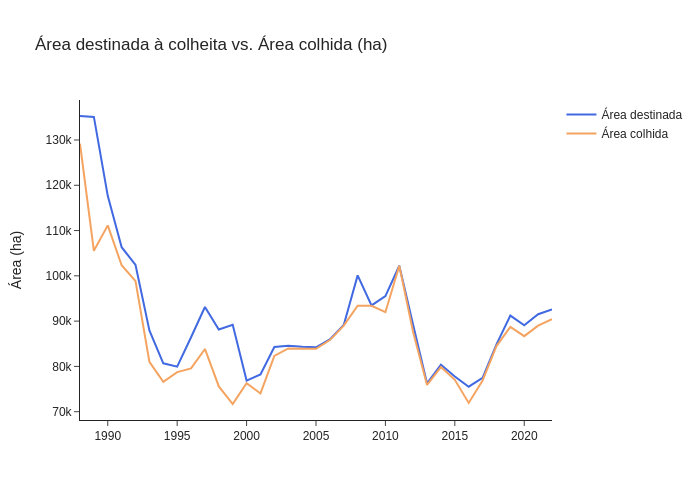

In [119]:
fig = px.line(df_area_por_ano, x='ano', y=['area_destinada_colheita', 'area_colhida'],
              title='Área destinada à colheita vs. Área colhida (ha)',
              color_discrete_sequence=['RoyalBlue','SandyBrown'])

# Mapeamento para os novos nomes das séries na legenda
nomes_novos = {'area_destinada_colheita': 'Área destinada',
              'area_colhida': 'Área colhida'}

# Atualizar o nome de cada série na figura
for trace in fig.data:
    trace.name = nomes_novos[trace.name]

fig.update_layout(xaxis_title='',
                  yaxis_title='Área (ha)',
                  legend_title_text='',
                  template='simple_white')
fig.show('png')



In [130]:
rendimento_medio_por_ano = df.groupby('ano')['rendimento_medio_producao'].mean().reset_index()
rendimento_medio_por_ano

,ano,rendimento_medio_producao
0,1988,14837.590548
1,1989,15151.746826
2,1990,13953.542441
3,1991,14535.769593
4,1992,14414.884798
5,1993,12730.435733
6,1994,14139.080175
7,1995,13591.671002
8,1996,12673.606568
9,1997,13544.409199


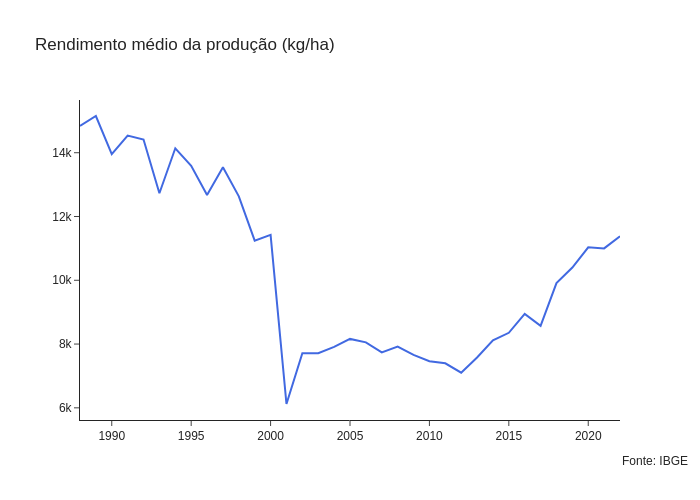

In [131]:
fig = px.line(rendimento_medio_por_ano, x='ano', y='rendimento_medio_producao',
              title='Rendimento médio da produção (kg/ha)',
              color_discrete_sequence=['RoyalBlue'])
fig.update_layout(xaxis_title='',
                  yaxis_title='',
                  template='simple_white')
fig.update_layout(
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=1,
            y=-0.1,  # Ajuste a coordenada y para posicionar o rodapé abaixo do gráfico
            xanchor='left',
            yanchor='top',
            text='Fonte: IBGE',
            font=dict(size=12),
            showarrow=False
        )
    ]
)
fig.show('png')

In [132]:
df_produtividade = df.groupby(['produto', 'ano'])['quantidade_produzida', 'area_colhida'].sum().reset_index()
df_produtividade['produtividade_media'] = (df_produtividade['quantidade_produzida'] / df_produtividade['area_colhida'])
df_produtividade


,produto,ano,quantidade_produzida,area_colhida,produtividade_media
0,Abacate,1988,3487.26,501,6.960599
1,Abacate,1989,3253.94,457,7.120219
2,Abacate,1990,3835.72,487,7.876222
3,Abacate,1991,3876.00,470,8.246809
4,Abacate,1992,3248.62,463,7.016458
...,...,...,...,...,...
593,Uva,2018,426392.00,8745,48.758376
594,Uva,2019,456080.00,8806,51.79196
595,Uva,2020,349757.00,8298,42.149554
596,Uva,2021,420501.00,8838,47.578751


In [133]:
df_valor_producao = df.groupby(['produto', 'ano'])['valor_producao', 'quantidade_produzida'].sum().reset_index()


In [134]:
df_valor_producao.sort_values('valor_producao', ascending=False).head(20)

,produto,ano,valor_producao,quantidade_produzida
597,Uva,2022,1712957.0,338206.0
596,Uva,2021,1549239.0,420501.0
595,Uva,2020,1252711.0,349757.0
594,Uva,2019,1250585.0,456080.0
593,Uva,2018,999254.0,426392.0
592,Uva,2017,927162.0,449383.0
591,Uva,2016,746579.0,368441.0
588,Uva,2013,658460.0,228727.0
94,Banana (cacho),2022,633171.0,490440.0
589,Uva,2014,590557.0,236719.0


In [274]:
rendimento_medio_por_produto = df.groupby(['produto', 'ano'])['rendimento_medio_producao'].mean().reset_index()

rendimento_medio_por_produto = rendimento_medio_por_produto.sort_values('rendimento_medio_producao', ascending=False)

In [273]:
fig = px.bar(rendimento_medio_por_produto, x='ano', y='rendimento_medio_producao', color='produto',
              title='Rendimento Médio da Produção ao Longo do Tempo por Produto')
fig.show()